## Classification Technique on the Breast Cancer dataset

###  [Introduction]
- Specifically, build a decision tree, logistic regression and k-nearest neighbors that predicts the diagnose result based on ten real-valued features (mean, standard error, and "worst" or largest of these features).
- Explore how well different model perform for several different parameter values. When is overfitting and when is underfitting? Show how you set the model that provides the best predictive performance.
- Present a brief overview of your predictive modeling process, explorations, and discuss your results. Make sure you present information about the model “goodness” (possible things to think about: confusion matrix, predictive accuracy, classification error, precision, recall, f-measure). 

In [1]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
## Explore the data set
print(breast_cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
## How many rows and columns
print(breast_cancer.data.shape)

(569, 30)


In [5]:
## There are two classes
print("The classes are:", breast_cancer.target_names)

The classes are: ['malignant' 'benign']


In [6]:
## Check the target variable distribution
target_df = pd.DataFrame(breast_cancer.target, columns=["Target"])
class_counts = target_df["Target"].value_counts()
print(class_counts)

1    357
0    212
Name: Target, dtype: int64


In [7]:
## There are 10 feauters with 3 matrix: mean, standard error, worst
print("The features in the data set are:", breast_cancer.feature_names)

The features in the data set are: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


## Decision Tree Model

([], [])

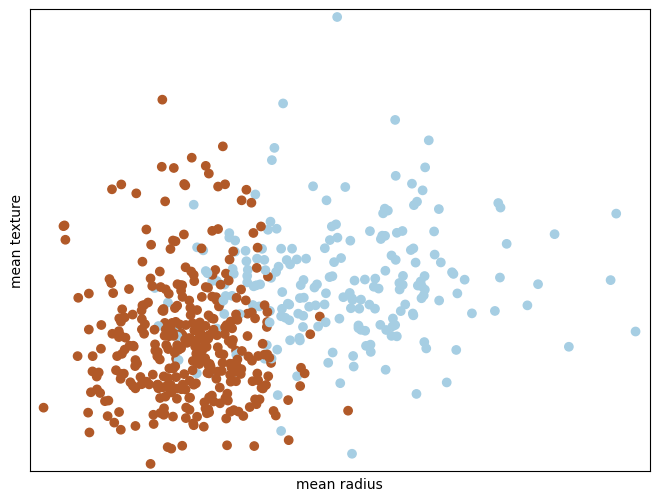

In [8]:
## Visualization of the data set
from mpl_toolkits.mplot3d import Axes3D

X = breast_cancer.data[:, :31]
Y = breast_cancer.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points, choose first two features
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('mean radius')
plt.ylabel('mean texture')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Create a decision tree classifier
decision_tree = DecisionTreeClassifier()

# Define the hyperparameter grid to search
# Based on chart above, I would try out 3 to 10
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(breast_cancer.data, breast_cancer.target)

# Print the best hyperparameters and corresponding accuracy
best_max_depth = grid_search.best_params_['max_depth']
best_accuracy = grid_search.best_score_
print(f"Best max_depth: {best_max_depth}")
print(f"Best Accuracy: {best_accuracy:.2f}")

Best max_depth: 5
Best Accuracy: 0.93


### Based on grid search, we would find out the best max_depth in decision treee model. 
### Check if there is overfitting problem when choosing the prefered max_depth

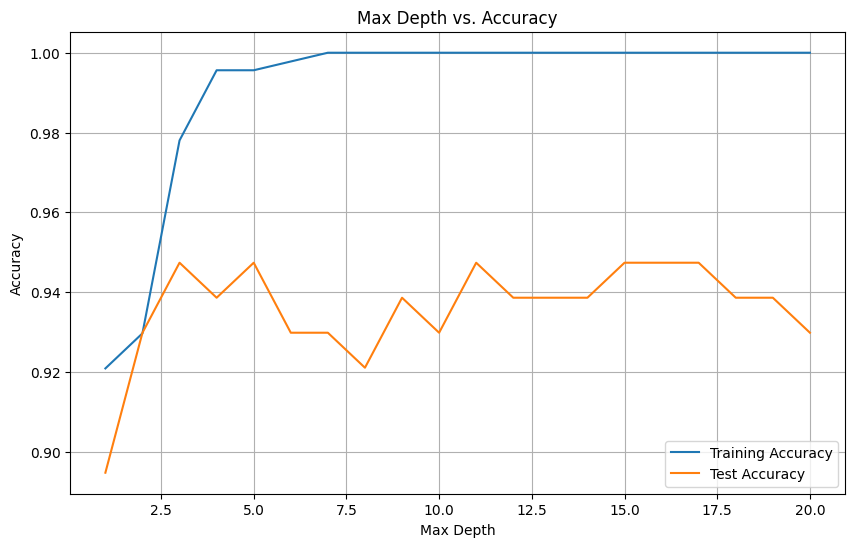

In [55]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42
)

# Define a range of max_depth values to test
max_depth_values = range(1, 21)

# Initialize empty lists to store training and validation accuracies
train_accuracies = []
val_accuracies = []

# Loop through each max_depth value and train a decision tree model
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    
    # Calculate training and validation accuracies
    train_accuracy = clf.score(X_train, y_train)
    val_accuracy = clf.score(X_val, y_val)
    
    # Append accuracies to the lists
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Plot max_depth vs. accuracy
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy')
plt.plot(max_depth_values, val_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Max Depth vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### If both train and test accuracies are consistently low accross different values of "max_dept", it's an indication of underfitting. This suggests that the model is too simple to capture the underlying patterns in the data. However, based on the chart and cross validation above, the accuracies are consistently high, this model would not have underfitting problem.

### Overfitting often occurs when the training accuracy is significantly higher than the test accuracy. If the "Training Accuracy" line (blue) continues to increase or remain high while the "Validation Accuracy" line (orange) starts to plateau or decrease, it suggests overfitting. From the chart above, after max_depth > 5, the data strat to have overfitting problem. Hence, we shouldn't choose max_depth larger than 5. In this case, I choose max_dept = 5 to train the model

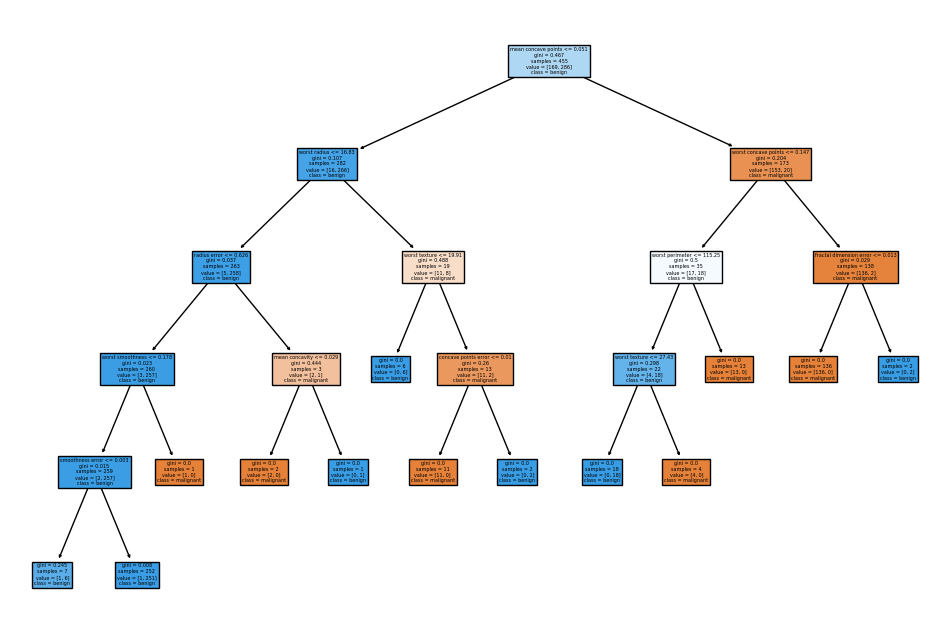

Validation Accuracy: 0.93


In [42]:
# Initialize the Decision Tree Classifier with a specified max_depth
max_depth = 5
clf = DecisionTreeClassifier(max_depth=max_depth)

# Train the model on the training data
clf.fit(X_train, y_train)

# Visualize the Decision Tree (optional)
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=breast_cancer.feature_names,
    class_names=breast_cancer.target_names,
    filled=True,
)
plt.show()

# Evaluate the model on the validation set (optional)
validation_accuracy = clf.score(X_val, y_val)
print(f"Validation Accuracy: {validation_accuracy:.2f}")

In [43]:
# Evaluate performance by cross-validation, use 5 folders
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Perform cross-validation
cv = 5  # Number of cross-validation folds

# Define custom scoring functions for different metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Initialize the classifier (clf) as needed

# Perform cross-validation and calculate scores for each metric
for metric_name, scoring_function in scoring.items():
    scores = cross_val_score(clf, breast_cancer.data, breast_cancer.target, cv=cv, scoring=scoring_function)
    
    # Print scores for each fold
    for fold, score in enumerate(scores, start=1):
        print(f"{metric_name.capitalize()} - Fold {fold}: {score:.2f}")

    # Calculate and print the mean score across all folds
    mean_score = scores.mean()
    print(f"Mean {metric_name.capitalize()}: {mean_score:.2f}")

Accuracy - Fold 1: 0.91
Accuracy - Fold 2: 0.89
Accuracy - Fold 3: 0.92
Accuracy - Fold 4: 0.95
Accuracy - Fold 5: 0.90
Mean Accuracy: 0.92
Precision - Fold 1: 0.94
Precision - Fold 2: 0.90
Precision - Fold 3: 0.93
Precision - Fold 4: 0.96
Precision - Fold 5: 0.97
Mean Precision: 0.94
Recall - Fold 1: 0.90
Recall - Fold 2: 0.93
Recall - Fold 3: 0.96
Recall - Fold 4: 0.96
Recall - Fold 5: 0.89
Mean Recall: 0.93
F1 - Fold 1: 0.93
F1 - Fold 2: 0.95
F1 - Fold 3: 0.95
F1 - Fold 4: 0.95
F1 - Fold 5: 0.93
Mean F1: 0.94
Roc_auc - Fold 1: 0.92
Roc_auc - Fold 2: 0.91
Roc_auc - Fold 3: 0.88
Roc_auc - Fold 4: 0.96
Roc_auc - Fold 5: 0.91
Mean Roc_auc: 0.92


## KNN Model

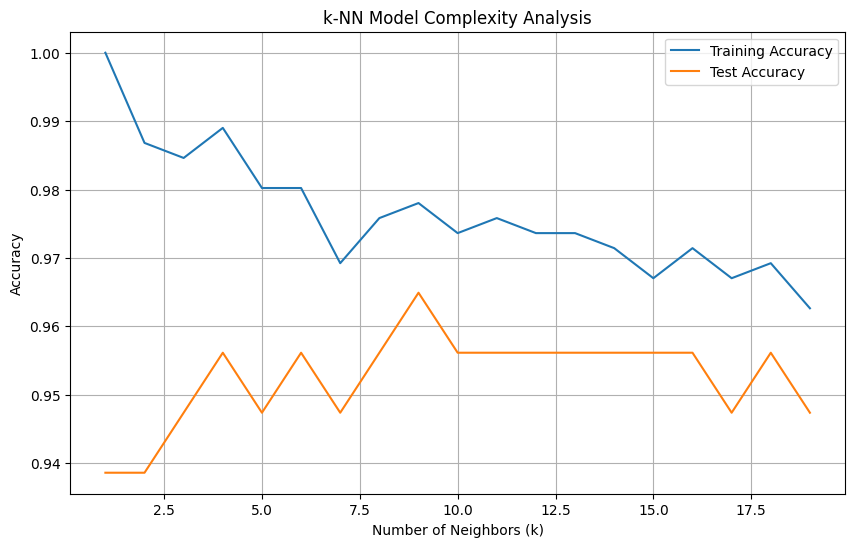

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42
)

# Initialize the StandardScaler for feature scaling
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Try different k values
k_values = range(1, 20)

# Initialize empty lists to hold accuracies
train_accuracies = []
test_accuracies = []

# Loop through each k value
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the k-NN model on the training data
    knn_classifier.fit(X_train_scaled, y_train)
    
    # Calculate and store the training accuracy
    train_accuracy = knn_classifier.score(X_train_scaled, y_train)
    train_accuracies.append(train_accuracy)
    
    # Calculate and store the test accuracy
    test_accuracy = knn_classifier.score(X_test_scaled, y_test)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Test Accuracy')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("k-NN Model Complexity Analysis")
plt.legend()
plt.grid()
plt.show()

### When k<=4, the training accuracy is close to 1 while teh test accuracy is significantly loweer, it indicates that the model is likely overfitting. 
### Since both the training and testing accuracy are higher than 0.7, there is no underfitting problem in this data set.

In [50]:
## Use grid search to find out the best parameter
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Create a k-NN classifier
knn_classifier = KNeighborsClassifier()

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_knn_model = grid_search.best_estimator_
best_params

{'n_neighbors': 9}

### Use Grid search to find out the best parameter is k=9. In next step, I fit the model according to the parameter.

In [51]:
# Initialize the k-NN classifier (choose the value of k)
k = 9
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on both training and test data
y_train_pred = knn_classifier.predict(X_train)
y_test_pred = knn_classifier.predict(X_test)

# Classification report and confusion matrix for training set
print("Training Set Performance:")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

# Classification report and confusion matrix for test set
print("Test Set Performance:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Training Set Performance:
[[147  22]
 [  9 277]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       169
           1       0.93      0.97      0.95       286

    accuracy                           0.93       455
   macro avg       0.93      0.92      0.93       455
weighted avg       0.93      0.93      0.93       455

Test Set Performance:
[[39  4]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [54]:
# Perform cross-validation
cv = 5  # Number of cross-validation folds

# Define custom scoring functions for different metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc':'roc_auc'
}

# Initialize the classifier (clf) as needed

# Perform cross-validation and calculate scores for each metric
for metric_name, scoring_function in scoring.items():
    scores = cross_val_score(knn_classifier, breast_cancer.data, breast_cancer.target, cv=cv, scoring=scoring_function)
    
    # Print scores for each fold
    for fold, score in enumerate(scores, start=1):
        print(f"{metric_name.capitalize()} - Fold {fold}: {score:.2f}")

    # Calculate and print the mean score across all folds
    mean_score = scores.mean()
    print(f"Mean {metric_name.capitalize()}: {mean_score:.2f}")

Accuracy - Fold 1: 0.88
Accuracy - Fold 2: 0.94
Accuracy - Fold 3: 0.95
Accuracy - Fold 4: 0.96
Accuracy - Fold 5: 0.94
Mean Accuracy: 0.93
Precision - Fold 1: 0.85
Precision - Fold 2: 0.93
Precision - Fold 3: 0.95
Precision - Fold 4: 0.95
Precision - Fold 5: 0.97
Mean Precision: 0.93
Recall - Fold 1: 0.97
Recall - Fold 2: 0.97
Recall - Fold 3: 0.97
Recall - Fold 4: 0.99
Recall - Fold 5: 0.93
Mean Recall: 0.97
F1 - Fold 1: 0.91
F1 - Fold 2: 0.95
F1 - Fold 3: 0.96
F1 - Fold 4: 0.97
F1 - Fold 5: 0.95
Mean F1: 0.95
Roc_auc - Fold 1: 0.96
Roc_auc - Fold 2: 0.96
Roc_auc - Fold 3: 0.99
Roc_auc - Fold 4: 0.97
Roc_auc - Fold 5: 0.95
Mean Roc_auc: 0.97


## Logistic Regression

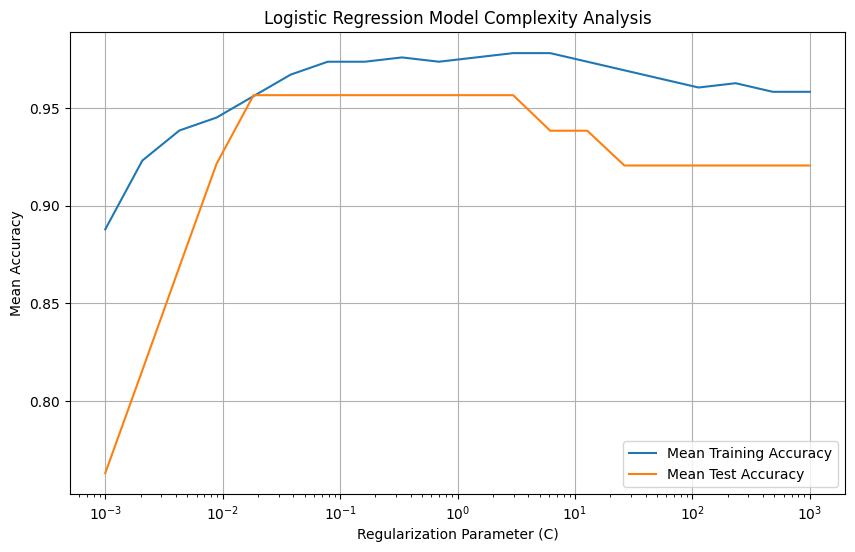

Best C value: 0.018329807108324356


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=42)

# Initialize the StandardScaler for feature scaling
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Define a range of values for the regularization parameter C
C_values = np.logspace(-3, 3, 20)

# Initialize empty lists to hold mean cross-validated accuracies
mean_train_accuracies = []
mean_test_accuracies = []

# Loop through each C value
for C in C_values:
    logistic_regression_model = LogisticRegression(C=C, max_iter=1000)
    
    # Perform cross-validation and store mean accuracies
    train_accuracies = cross_val_score(logistic_regression_model, X_train_scaled, y_train, cv=5)
    test_accuracies = cross_val_score(logistic_regression_model, X_test_scaled, y_test, cv=5)
    
    mean_train_accuracy = np.mean(train_accuracies)
    mean_test_accuracy = np.mean(test_accuracies)
    
    mean_train_accuracies.append(mean_train_accuracy)
    mean_test_accuracies.append(mean_test_accuracy)

# Find the C value with the highest mean cross-validated test accuracy
best_C = C_values[np.argmax(mean_test_accuracies)]

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, mean_train_accuracies, label='Mean Training Accuracy')
plt.semilogx(C_values, mean_test_accuracies, label='Mean Test Accuracy')
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("Mean Accuracy")
plt.title("Logistic Regression Model Complexity Analysis")
plt.legend()
plt.grid()
plt.show()

# Print the best C value
print(f"Best C value: {best_C}")

In [75]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logistic_regression_model = LogisticRegression(C=0.0183, max_iter =1000)

# Fit the model on the scaled training data
logistic_regression_model.fit(X_train_scaled, y_train)

# Make predictions on both training and test data
y_train_pred = logistic_regression_model.predict(X_train_scaled)
y_test_pred = logistic_regression_model.predict(X_test_scaled)

# Classification report and confusion matrix for training set
print("Training Set Performance:")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

# Classification report and confusion matrix for test set
print("Test Set Performance:")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Training Set Performance:
[[155  14]
 [  1 285]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       169
           1       0.95      1.00      0.97       286

    accuracy                           0.97       455
   macro avg       0.97      0.96      0.96       455
weighted avg       0.97      0.97      0.97       455

Test Set Performance:
[[40  3]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [77]:
# Perform cross-validation
cv = 5  # Number of cross-validation folds

# Define custom scoring functions for different metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Initialize the classifier (clf) as needed

# Perform cross-validation and calculate scores for each metric
for metric_name, scoring_function in scoring.items():
    scores = cross_val_score(logistic_regression_model, breast_cancer.data, breast_cancer.target, cv=cv, scoring=scoring_function)
    
    # Print scores for each fold
    for fold, score in enumerate(scores, start=1):
        print(f"{metric_name.capitalize()} - Fold {fold}: {score:.2f}")

    # Calculate and print the mean score across all folds
    mean_score = scores.mean()
    print(f"Mean {metric_name.capitalize()}: {mean_score:.2f}")

Accuracy - Fold 1: 0.93
Accuracy - Fold 2: 0.95
Accuracy - Fold 3: 0.97
Accuracy - Fold 4: 0.92
Accuracy - Fold 5: 0.95
Mean Accuracy: 0.94
Precision - Fold 1: 0.90
Precision - Fold 2: 0.95
Precision - Fold 3: 0.99
Precision - Fold 4: 0.93
Precision - Fold 5: 0.99
Mean Precision: 0.95
Recall - Fold 1: 1.00
Recall - Fold 2: 0.97
Recall - Fold 3: 0.97
Recall - Fold 4: 0.94
Recall - Fold 5: 0.93
Mean Recall: 0.96
F1 - Fold 1: 0.95
F1 - Fold 2: 0.96
F1 - Fold 3: 0.98
F1 - Fold 4: 0.94
F1 - Fold 5: 0.96
Mean F1: 0.96
Roc_auc - Fold 1: 0.99
Roc_auc - Fold 2: 0.99
Roc_auc - Fold 3: 1.00
Roc_auc - Fold 4: 0.98
Roc_auc - Fold 5: 1.00
Mean Roc_auc: 0.99


## Summary
### Based on performance matrix below, I would choose logistic regression since all the matrix are working better in the brease cancer data set.

|      Model    | Mean Accuracy | Mean Precision | Mean Recall | Mean Roc_acu | Hyper Parameter | 
|:--------------|:-------------:|:--------------:|:-----------:|:------------:|:---------------:|
| Decision Tree |     0.92      |      0.94      |     0.93    |     0.92     |    max_dept=5   |
| KMM           |     0.93      |      0.93      |     0.95    |     0.97     |    k=9          |
| Logistic Regression|     0.94 |      0.95      |     0.96    |     0.99     |    C = 0.0183   |
